# 📊 Análisis Predictivo de la Calidad del Aire en la India (2015-2020) usando Estadística y Machine Learning 📊
## Autora: Gladys Choque Ulloa
### Descripción: En este exercicio analizaremos la calidad del aire en diferentes ciudades de la India entre 2015 y 2020. Exploraremos tendencias de contaminantes como el PM2.5 y aplicaremos técnicas estadísticas junto a modelos de machine learning para entender y predecir los niveles de contaminación. Este análisis se realizó en Google Colab utilizando Python y bibliotecas como pandas, seaborn y scikit-learn.###


# --------------------------------------------
# 📦 Paso 1: Carga y extracción de Datos
# --------------------------------------------
### En este paso, se carga un archivo .zip que contiene la base de datos real sobre la calidad del aire. Usamos las bibliotecas zipfile y os para gestionar archivos comprimidos y trabajar con el sistema de archivos. Específicamente, hacemos lo siguiente: ###

In [ ]:
import zipfile
import os

# Nombre del archivo ZIP que subiste
zip_path = "air-quality-data.zip"

# Crear una carpeta donde extraer
extract_to = "data"
os.makedirs(extract_to, exist_ok=True)

# Extraer archivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("¡ZIP extraído con éxito!")


¡ZIP extraído con éxito!


# --------------------------------------------
#📂 Paso 2: Visualizar los archivos extraídos
# --------------------------------------------
### Una vez extraído el ZIP, es importante conocer qué archivos tenemos disponibles para su análisis. Este bloque recorre la carpeta donde se guardaron los archivos y lista su contenido.

In [ ]:
import os

# Lista de archivos extraídos
for root, dirs, files in os.walk(extract_to):
    for file in files:
        print(file)


city_hour.csv
station_day.csv
city_day.csv
stations.csv
station_hour.csv


# -----------------------------------------------
#📥 Paso 3: Cargar los datos de calidad del aire
# -----------------------------------------------
### Ahora que sabemos qué archivos tenemos, cargamos el archivo principal que contiene los datos diarios de calidad del aire por ciudad en India.

In [ ]:
import pandas as pd

df = pd.read_csv("data/city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# ----------------------------------------
#🔧 Paso 4: Importar librerías necesarias
# ----------------------------------------
## Antes de continuar con el análisis y modelado de los datos, importamos todas las bibliotecas que utilizaremos a lo largo del tutorial.

In [ ]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# -------------------------------
#🔍 Paso 5: Exploración inicial del dataset
# -------------------------------
### Una vez cargado el archivo CSV, es importante entender la estructura del conjunto de datos. Esto nos permitirá identificar qué variables tenemos disponibles y cómo están organizadas.

In [ ]:
df = pd.read_csv("data/city_day.csv")

print("Columnas disponibles en el dataset:")
print(df.columns)

print("\nPrimeras filas del dataset para conocer la estructura:")
print(df.head())

print("\nInformación general del dataset:")
print(df.info())

Columnas disponibles en el dataset:
Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Primeras filas del dataset para conocer la estructura:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00 

# -------------------------------
# 🌫️ Paso 2: Exploración inicial de PM2.5
# -------------------------------
## Limpiamos los datos eliminando filas sin valores en PM2.5.
## Visualizamos la distribución de PM2.5 con un histograma y una curva KDE para entender su comportamiento, lo que es clave para decidir qué tipo de análisis estadístico aplicar.


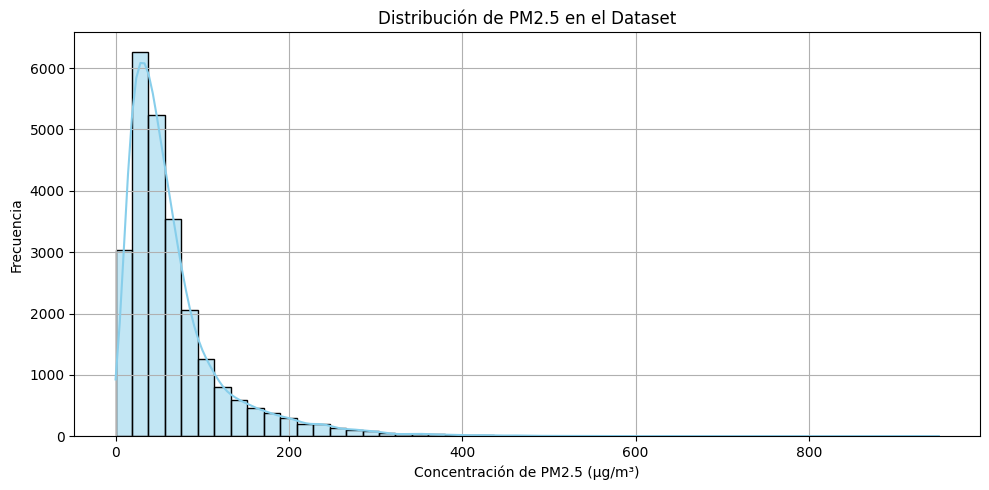

In [ ]:
df_pm25 = df.dropna(subset=['PM2.5'])

plt.figure(figsize=(10, 5))
sns.histplot(df_pm25['PM2.5'], bins=50, kde=True, color='skyblue')
plt.title("Distribución de PM2.5 en el Dataset")
plt.xlabel("Concentración de PM2.5 (µg/m³)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 📈 Paso 7: Estimación de parámetros por Máxima Verosimilitud (MLE)
# -------------------------------
## Aquí asumimos que PM2.5 sigue una distribución normal.
## Utilizamos el método de máxima verosimilitud para estimar la media (μ) y desviación estándar (σ) que mejor describen los datos observados.

Parámetros estimados por MLE:
Media (μ): 67.45
Desviación estándar (σ): 64.66


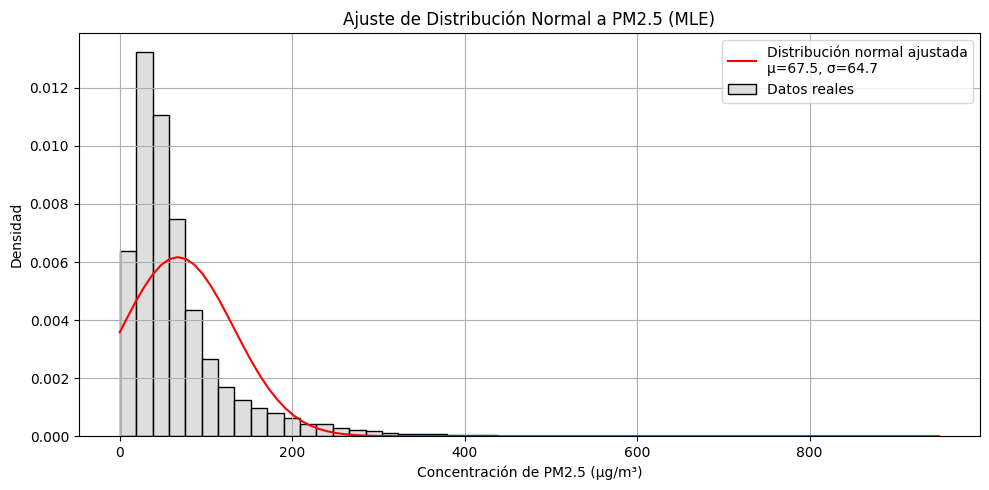

In [ ]:
mu_mle, std_mle = norm.fit(df_pm25['PM2.5'])

print(f"Parámetros estimados por MLE:")
print(f"Media (μ): {mu_mle:.2f}")
print(f"Desviación estándar (σ): {std_mle:.2f}")

# Visualizamos la distribución ajustada junto a los datos reales

x = np.linspace(df_pm25['PM2.5'].min(), df_pm25['PM2.5'].max(), 100)
pdf = norm.pdf(x, mu_mle, std_mle)

plt.figure(figsize=(10, 5))
sns.histplot(df_pm25['PM2.5'], bins=50, kde=False, stat='density', color='lightgray', label='Datos reales')
plt.plot(x, pdf, 'r-', label=f'Distribución normal ajustada\nμ={mu_mle:.1f}, σ={std_mle:.1f}')
plt.title("Ajuste de Distribución Normal a PM2.5 (MLE)")
plt.xlabel("Concentración de PM2.5 (µg/m³)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 📊 Paso 8: Modelo de regresión lineal con OLS
# -------------------------------
## En este paso modelamos cómo las variables contaminantes PM10, NO2 y CO explican la variabilidad de PM2.5 usando regresión lineal ordinaria (OLS).
## Esto nos permite entender la relación lineal y el impacto relativo de cada contaminante.

In [ ]:
variables = ['PM2.5', 'PM10', 'NO2', 'CO']
df_model = df[variables].dropna()

X = df_model[['PM10', 'NO2', 'CO']]  # Variables predictoras
y = df_model['PM2.5']                # Variable objetivo

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Ajustar modelo OLS
model = sm.OLS(y, X).fit()

print("\nResumen del modelo de regresión OLS adaptado:")
print(model.summary())


Resumen del modelo de regresión OLS adaptado:
                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:44:33   Log-Likelihood:                -80565.
No. Observations:               17052   AIC:                         1.611e+05
Df Residuals:                   17048   BIC:                         1.612e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

# -------------------------------
# 📉 Paso 9: Modelo de Machine Learning - Random Forest Regressor
# -------------------------------
## Aplicamos un modelo de Random Forest para predecir PM2.5.
## Este modelo puede capturar relaciones complejas y no lineales sin suponer distribución de los datos.


In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluamos el desempeño con métricas comunes
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluación del modelo Random Forest:")
print(f"Error cuadrático medio (MSE): {mse:.3f}")
print(f"Coeficiente de determinación (R²): {r2:.3f}")


Evaluación del modelo Random Forest:
Error cuadrático medio (MSE): 957.591
Coeficiente de determinación (R²): 0.688


# -----------------------------------------
# 📉 Paso 10: Visualización de resultados
# -----------------------------------------
## Comparamos visualmente las predicciones del Random Forest con los valores reales
## para evaluar qué tan bien el modelo está capturando la variabilidad de PM2.5.

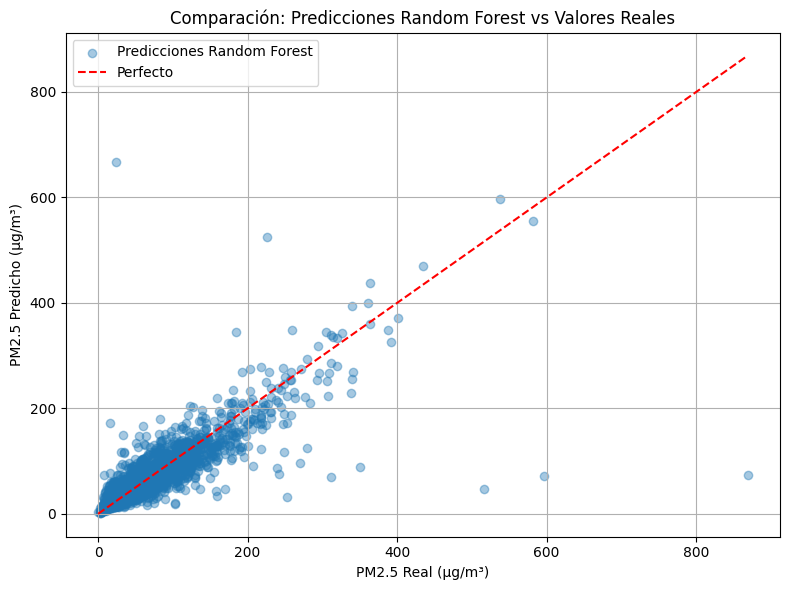

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, label="Predicciones Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfecto")
plt.xlabel("PM2.5 Real (µg/m³)")
plt.ylabel("PM2.5 Predicho (µg/m³)")
plt.title("Comparación: Predicciones Random Forest vs Valores Reales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# -------------------------------
# Conclusión
# -------------------------------

## ✔️ En este tutorial hemos realizado:
- Estimación estadística con Máxima Verosimilitud para entender la distribución de PM2.5.
- Modelado explicativo usando regresión lineal OLS para cuantificar el impacto de contaminantes.
- Modelado predictivo avanzado con Random Forest para mejorar la predicción de PM2.5.
- Visualización clara para interpretar resultados y evaluar modelos.

Este flujo integra fundamentos estadísticos con machine learning, una combinación poderosa para análisis de datos reales.


### ⬇ A continuación se muestra la gráfica del PASO 10 en movimiento.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# Convertir a numpy arrays si no lo son
y_test_arr = y_test.to_numpy() if hasattr(y_test, "to_numpy") else np.array(y_test)
y_pred_arr = y_pred.to_numpy() if hasattr(y_pred, "to_numpy") else np.array(y_pred)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(y_test_arr.min() * 0.9, y_test_arr.max() * 1.1)
ax.set_ylim(y_test_arr.min() * 0.9, y_test_arr.max() * 1.1)
ax.set_xlabel("PM2.5 Real (µg/m³)")
ax.set_ylabel("PM2.5 Predicho (µg/m³)")
ax.set_title("Comparación: Predicciones Random Forest vs Valores Reales")
ax.grid(True)
ax.plot([y_test_arr.min(), y_test_arr.max()], [y_test_arr.min(), y_test_arr.max()], 'r--', label="Perfecto")
scat = ax.scatter([], [], alpha=0.4, label="Predicciones Random Forest")
ax.legend()

# Reducir frames agrupando por bloques
n_points = len(y_test_arr)
block_size = 100  # ajustar este valor para menos/más frames
frames = list(range(0, n_points + block_size, block_size))

def update(frame):
    end_idx = min(frame, n_points)
    scat.set_offsets(np.c_[y_test_arr[:end_idx], y_pred_arr[:end_idx]])
    return scat,

ani = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

ani.save("random_forest_predictions.gif", writer=PillowWriter(fps=10))

plt.close(fig)
